# Project Title:
# An Applied A/B Testing Analysis to Evaluate Discount Strategy Impact on Business Profit

Required libraries install

#Objective of the Project
The goal of this project is:

To compare two business strategies using A/B testing and statistical analysis and decide which strategy is better for the business.

    Variant A = Low discount strategy (Discount ≤ 20%)

    Variant B = High discount strategy (Discount > 20%)

The key business question is:

“Does giving higher discounts really improve business performance, or does it hurt profit?”

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn

Libraries import

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns



Dataset load

In [ ]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Data Quality Check

In [ ]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Purpose:

    To check:

    Missing values

    Data types

    Data ranges

    Whether the dataset is usable for analysis

Variant column  (A/B groups)

In [ ]:
df["Variant"] = df["Discount"].apply(lambda x: "A" if x <= 0.2 else "B")


# Meaning:

    Orders with low discount → Variant A

    Orders with high discount → Variant B

In [ ]:
df["Variant"].value_counts()


,count
Variant,
A,8601
B,1393


Groups split

In [ ]:
A = df[df["Variant"] == "A"]
B = df[df["Variant"] == "B"]


## Now you have two groups:

    Group A = Low discount strategy

    Group B = High discount strategy

Descriptive Statistics

In [ ]:
summary = df.groupby("Variant").agg(
    mean_sales = ("Sales", "mean"),
    mean_profit = ("Profit", "mean"),
    std_profit = ("Profit", "std"),
    n = ("Profit", "count")
)

summary


,mean_sales,mean_profit,std_profit,n
Variant,,,,
A,224.907651,49.037679,208.377669,8601
B,260.423654,-97.183098,327.542304,1393


    Mean Sales

    Mean Profit

    Standard Deviation of Profit

    Number of records

# This gives a high-level summary of both strategies before doing statistical testing.

Visualization (Understanding difference)

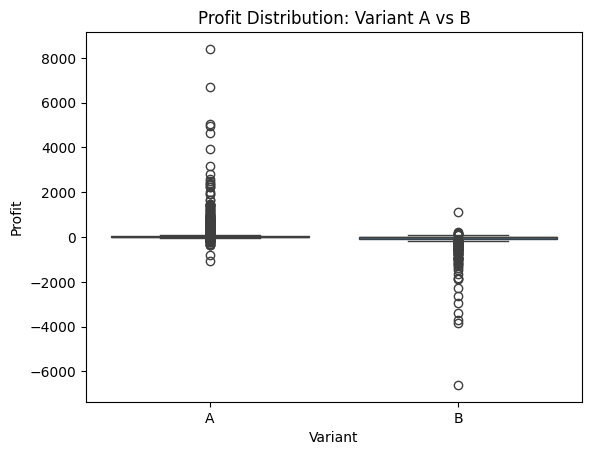

In [ ]:
sns.boxplot(x="Variant", y="Profit", data=df)
plt.title("Profit Distribution: Variant A vs B")
plt.show()


## Purpose:

    To visually compare:

    Spread of profit

    Median

    Outliers

    Risk



#Business Meaning:

This shows whether one strategy is more risky or more stable than the other.

Distribution Check(profit)

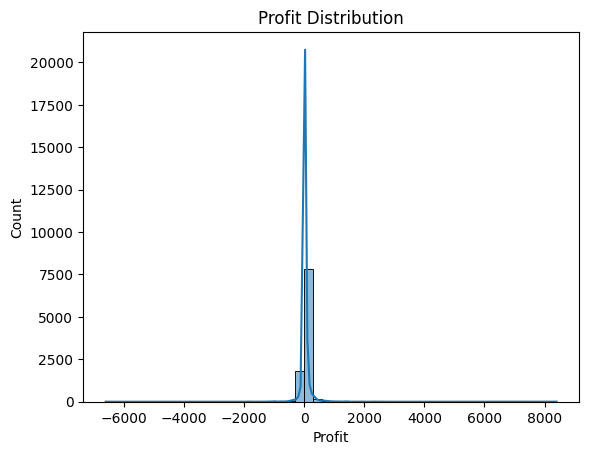

In [ ]:
sns.histplot(df["Profit"], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()


## Mean Profit Comparison

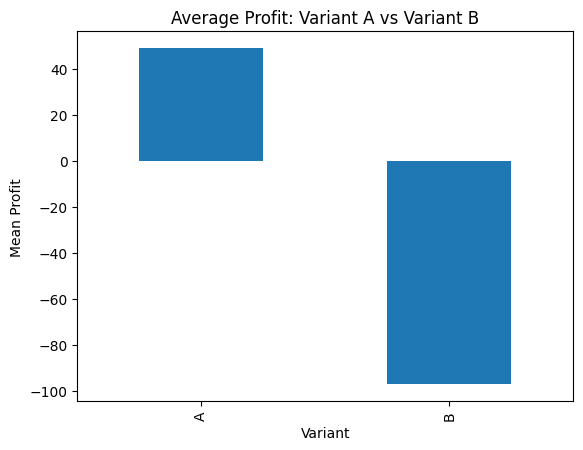

In [ ]:
df.groupby("Variant")["Profit"].mean().plot(kind="bar")
plt.title("Average Profit: Variant A vs Variant B")
plt.ylabel("Mean Profit")
plt.show()


Purpose:

    To directly show:

Which strategy gives higher average profit.



## purpose: which varient have more average profit

In [ ]:
df = df[df["Sales"] > 0]


You remove invalid / zero sales records to make the analysis more realistic and clean

A/B Test on SALES

In [ ]:
t_stat_sales, p_value_sales = ttest_ind(A["Sales"], B["Sales"], equal_var=False)

print("Sales t-test p-value:", p_value_sales)


Sales t-test p-value: 0.1216501537878504


To check:

Is the difference in sales between A and B statistically significant or just random?

A/B TEST (t-test on Profit)

In [ ]:
t_stat, p_value = ttest_ind(A["Profit"], B["Profit"], equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: 16.1409994038947
P-value: 2.2951802592338373e-54


# This gives:

    t-statistic

    p-value

# Interpretation:

    If p-value < 0.05:

# The difference is statistically significant (real, not by chance)

Segment-wise A/B Testing

In [ ]:
for cat in df["Category"].unique():
    sub = df[df["Category"] == cat]
    A_sub = sub[sub["Variant"] == "A"]
    B_sub = sub[sub["Variant"] == "B"]

    if len(A_sub) > 10 and len(B_sub) > 10:
        t, p = ttest_ind(A_sub["Profit"], B_sub["Profit"], equal_var=False)
        print(f"Category: {cat} | p-value: {p:.4f}")


Category: Furniture | p-value: 0.0000
Category: Office Supplies | p-value: 0.0000
Category: Technology | p-value: 0.0000


# TO run A/B tests separately for each:

    Category (Furniture, Technology, Office Supplies, etc.)

# Purpose:

    To check whether the result is consistent across business segments or not.

Region-wise A/B Testing

In [ ]:
for reg in df["Region"].unique():
    sub = df[df["Region"] == reg]
    A_sub = sub[sub["Variant"] == "A"]
    B_sub = sub[sub["Variant"] == "B"]

    if len(A_sub) > 10 and len(B_sub) > 10:
        t, p = ttest_ind(A_sub["Profit"], B_sub["Profit"], equal_var=False)
        print(f"Region: {reg} | p-value: {p:.4f}")


Region: South | p-value: 0.0000
Region: West | p-value: 0.0000
Region: Central | p-value: 0.0000
Region: East | p-value: 0.0000


# the same test for:

    Each Region

# Purpose:

    To verify if the strategy behaves differently in different markets.

##Effect Size (Cohen’s d)

##Interpretation:

0.2 = small

0.5 = medium

0.8+ = large impact

In [ ]:
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*x.var() + (ny-1)*y.var()) / dof)
    return (x.mean() - y.mean()) / pooled_std

d_profit = cohens_d(A["Profit"], B["Profit"])
print("Cohen's d (Profit):", d_profit)


Cohen's d (Profit): 0.6392684569235618


# Why this is important:

# 1.p-value only tells:

    Is the difference real or not?

# 2.Effect size tells:

    How big is the impact in business terms?

# Interpretation:

    0.2 = small impact

    0.5 = medium impact

    0.8+ = large impact

## Confidence Interval of Mean Difference

In [ ]:
diff = A["Profit"].mean() - B["Profit"].mean()

se = np.sqrt(A["Profit"].var()/len(A) + B["Profit"].var()/len(B))

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print("Mean difference:", diff)
print("95% CI:", (ci_low, ci_high))


Mean difference: 146.2207774210882
95% CI: (np.float64(128.46520252922738), np.float64(163.97635231294902))


# Meaning:

    This tells the expected range in which the true profit difference lies in the real world.

Decision Rule

In [ ]:
if p_value < 0.05:
    print(" Statistically significant difference between A and B")
else:
    print(" No statistically significant difference between A and B")


 Statistically significant difference between A and B


Which Variant is better??


In [ ]:
print("Mean Profit A:", A["Profit"].mean())
print("Mean Profit B:", B["Profit"].mean())


Mean Profit A: 49.0376790722009
Mean Profit B: -97.1830983488873


In [ ]:
if A["Profit"].mean() > B["Profit"].mean():
    print(" Variant A is better for business")
else:
    print(" Variant B is better for business")


 Variant A is better for business


In [ ]:
print("===== FINAL DECISION =====")

if p_value < 0.05:
    print("There is a statistically significant difference between A and B.")

    if A["Profit"].mean() > B["Profit"].mean():
        print("Recommend Variant A (Low Discount) for business.")
    else:
        print("Recommend Variant B (High Discount) for business.")
else:
    print("No statistically significant difference. Keep current strategy.")


===== FINAL DECISION =====
There is a statistically significant difference between A and B.
Recommend Variant A (Low Discount) for business.


In [ ]:
summary.to_csv("ab_test_summary.csv")


# Summary
#  I built an end-to-end applied A/B testing system in Python using real retail data, performed statistical significance testing, effect size analysis, confidence interval estimation, and segment-wise validation to recommend the best business strategy.